In [229]:
def check_columns(DataFrame, reports=False, graphs=False, dates=False):
    """
    This function takes a pandas dataframe as input and returns
    a dataframe with information about each column in the dataframe.
    """

    dataframeinfo = []

    # Check information about the index
    index_dtype = DataFrame.index.dtype
    index_unique_vals = DataFrame.index.unique()
    index_num_unique = DataFrame.index.nunique()
    index_num_null = DataFrame.index.isna().sum()
    index_pct_null = index_num_null / len(DataFrame.index)

    if pd.api.types.is_numeric_dtype(index_dtype) and not isinstance(
        DataFrame.index, pd.RangeIndex
    ):
        index_min_val = DataFrame.index.min()
        index_max_val = DataFrame.index.max()
        index_range_vals = (index_min_val, index_max_val)
    elif pd.api.types.is_datetime64_any_dtype(index_dtype):
        index_min_val = DataFrame.index.min()
        index_max_val = DataFrame.index.max()
        index_range_vals = (
            index_min_val.strftime("%Y-%m-%d"),
            index_max_val.strftime("%Y-%m-%d"),
        )

        # Check for missing dates in the index if dates kwarg is True
        if dates:
            full_date_range = pd.date_range(
                start=index_min_val, end=index_max_val, freq="D"
            )
            missing_dates = full_date_range.difference(DataFrame.index)
            if not missing_dates.empty:
                print(
                    f"Missing dates in index: ({len(missing_dates)} Total) {missing_dates.tolist()}"
                )
    else:
        index_range_vals = None

    dataframeinfo.append(
        [
            "index",
            index_dtype,
            index_num_unique,
            index_num_null,
            index_pct_null,
            index_unique_vals,
            index_range_vals,
        ]
    )

    print(f"Total rows: {DataFrame.shape[0]}")
    print(f"Total columns: {DataFrame.shape[1]}")

    if reports:
        describe = DataFrame.describe().round(2)
        print(describe)

    if graphs:
        DataFrame.hist(figsize=(10, 10))
        plt.subplots_adjust(hspace=0.5)
        plt.show()

    for column in DataFrame.columns:
        dtype = DataFrame[column].dtype
        num_null = DataFrame[column].isna().sum()
        pct_null = DataFrame[column].isna().mean().round(5)

        try:
            unique_vals = DataFrame[column].unique()
            num_unique = DataFrame[column].nunique()
        except TypeError:
            unique_vals = "Column contains multiple lists"
            num_unique = "ERROR"

        if pd.api.types.is_numeric_dtype(dtype):
            min_val = DataFrame[column].min()
            max_val = DataFrame[column].max()
            mean_val = DataFrame[column].mean()
            range_vals = (min_val, max_val, mean_val)
        elif pd.api.types.is_datetime64_any_dtype(dtype):
            min_val = DataFrame[column].min()
            max_val = DataFrame[column].max()
            range_vals = (min_val.strftime("%Y-%m-%d"), max_val.strftime("%Y-%m-%d"))

            if dates:
                full_date_range_col = pd.date_range(
                    start=min_val, end=max_val, freq="D"
                )
                missing_dates_col = full_date_range_col.difference(DataFrame[column])
                if not missing_dates_col.empty:
                    print(
                        f"Missing dates in column '{column}': ({len(missing_dates_col)} Total) {missing_dates_col.tolist()}"
                    )
                else:
                    print(f"No missing dates in column '{column}'")

        else:
            range_vals = None

        dataframeinfo.append(
            [column, dtype, num_unique, num_null, pct_null, unique_vals, range_vals]
        )

    return pd.DataFrame(
        dataframeinfo,
        columns=[
            "col_name",
            "dtype",
            "num_unique",
            "num_null",
            "pct_null",
            "unique_values",
            "range (min, max, mean)",
        ],
    )

# **Decoding Data Jobs**
##### **using Statistical Analysis, Natural Language Processing, and Classification**
<p align ="right">Zacharia Schmitz <br>
Joshua Click<br>
November 2023

---


### Rate Limits & Ethics:

Scraping

[**From GitHub Acceptable Use Policies**](https://docs.github.com/en/github/site-policy/github-acceptable-use-policies)

>"Short version: We host a wide variety of collaborative projects from all over the world, and that collaboration only works when our users are able   to work together in good faith. While using the Service, you must comply with our Acceptable Use Policies, which include some restrictions on content and conduct on GitHub related to user safety, intellectual property, privacy, authenticity, and other limitations. In short, be excellent to each
>other.

In [230]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

<div style="background-color: #; padding: 0px; ">

## <font size='10'><i>**Plan**</i></font> <font size='5'><i>→ Acquire → Prepare → Explore → Model → Deliver</i></font>

---

### Initial Hypotheses

1. Hypothesis

2. Hypothesis

3. Hypothesis

4. Hypothesis

5. Hypothesis

6. Hypothesis

<div style="background-color: #; padding: 0px; ">

## <font size='5'><i>Plan → </i></font> <font size='10'><i>**Acquire**</i></font> <font size='5'><i> → Prepare → Explore → Model → Deliver</i></font>

---

### Acquisition



- I originally intended on pulling all of the data myself using LinkedIn webscraping or another job resource.

- I was able to use a scraper for LinkedIn, but after reading into it, they don't like that and have been known to send cease and desist letters.

- Potential

- Google however, is allowed to scrape LinkedIn, for search engine purposes.

- Using Google's job search, we can then scrape all job postings (which also includes LinkedIn).

- Although we have the capability to scrape the postings ourself, due to the limitations, the amount of data to be useful isn't feasibly with the timeline.

- I found a public dataset that has a head start of 33 thousand job postings.

### The Dataset

Due to time constraints on the project and the value added when using a large dataset, we searched for a public dataset.

- We acquired the data from a Kaggle dataset that has been scraping "Data Analyst" job postings for the past year. The dataset has 33,000 entries as of 1 November 2023.

#### CSV From:

- https://www.kaggle.com/datasets/lukebarousse/data-analyst-job-postings-google-search/data?select=gsearch_jobs.csv

> "This dataset pulls job postings from Google's search results for Data Analyst positions in the United States. <br>
> Data collection started on November 4th, 2022, and adds ~100 new job postings to this dataset daily."

In [231]:
# Read in job_scrapes
jobs_df = pd.read_csv("./support_files/working_docs/jobs.csv")

In [232]:
check_columns(jobs_df)

Total rows: 34153
Total columns: 27


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,index,int64,34153,0,0.00000,"RangeIndex(start=0, stop=34153, step=1)",None
1,Unnamed: 0,int64,34153,0,0.00000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 34152, 17076.0)"
2,index,int64,3785,0,0.00000,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 3784, 1141.691418030627)"
3,title,object,13157,0,0.00000,"[Data Analyst, Junior Data Analyst/Scientist R...",None
4,company_name,object,8208,0,0.00000,"[Chloeta, Upwork, ATC, Guidehouse, AnMed Healt...",None
5,location,object,635,24,0.00070,"[ Oklahoma City, OK , Anywhere , United ...",None
6,via,object,556,9,0.00026,"[via ZipRecruiter, via Upwork, via LinkedIn, v...",None
7,description,object,24276,0,0.00000,[Job Summary: The Data Analyst oversees data p...,None
8,extensions,object,5528,0,0.00000,"[['21 hours ago', 'Full-time', 'Health insuran...",None
9,job_id,object,34133,0,0.00000,[eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb...,None


| Field Name | Description |
| --- | --- |
| `Unnamed: 0` | Appears to be an auto-incremented identifier. |
| `index` | Another identifier, possibly redundant with "Unnamed: 0". |
| `title` | Job title. |
| `company_name` | Name of the company offering the job. |
| `location` | Location of the job. |
| `via` | Source/platform where the job was posted. |
| `description` | Detailed description of the job. |
| `extensions` | Additional information about the job (e.g., job type, benefits). |
| `job_id` | A unique identifier for the job, possibly encoded. |
| `thumbnail` | URL to a thumbnail image associated with the job/company. |
| `url` | URL for the job posting. |
| `company_description` | Description of the company. |
| `company_rating` | Company's rating. |
| `rating_count` | Number of ratings the company received. |
| `job_type` | Type of the job (e.g., full-time, part-time). |
| `benefits` | List of benefits provided by the company. |
| `posted` | When the job was posted. |
| `deadline` | Application deadline for the job. |
| `employment_type` | Employment type (e.g., full-time, contract). |
| `commute_time` | Information on commute time, if available. |
| `salary_pay` | Salary payment value, if available. |
| `salary_rate` | Salary rate (e.g., per hour, per year), if available. |
| `salary_avg` | Average salary for the job, if available. |
| `salary_min` | Minimum salary for the job, if available. |
| `salary_max` | Maximum salary for the job, if available. |
| `salary_hourly` | Hourly salary, if available. |
| `salary_yearly` | Yearly salary, if available. |
| `salary_standardized` | Standardized salary information, if available. |
| `description_tokens` | List of skills extracted from the job description. |

<div style="background-color: #; padding: 0px; ">

## <font size='5'><i>Plan → Acquire → </i></font> <font size='10'><i>**Prepare**</i></font> <font size='5'><i> → Explore → Model → Deliver</i></font>

--- 

The dataset had some columns that were engineered since the scraping. Due to us wanting reproducability for our own scraped data, we did not use any of the engineered columns from the dataset, and developed our own. We also dropped columns that we do not intend to use.

From the original dataset, we dropped:

### Drop Some Columns

In [233]:
jobs_df_cleaned = jobs_df[
    [
        "title",
        "company_name",
        "location",
        "via",
        "description",
        "posted_at",
        "schedule_type",
        "work_from_home",
        "salary",
        "job_id",
        "date_time",
        "salary_pay",
        "salary_rate",
    ]
]

# 'Unnamed: 0', # Extra index column
# 'index', # Extra index column
# 'extensions', # Google defined tokens for the posting, oftentimes benefits packages. Maybe later.
# 'thumbnail', # The companies thumbnail
# 'search_term', # All are "Data Analyst"
# 'search_location', # All are United States
# 'commute_time', # Not using
# 'salary_avg', # Will engineer our own
# 'salary_min', # Will engineer our own
# 'salary_max', # Will engineer our own
# 'salary_hourly', # Will engineer our own
# 'salary_yearly', # Will engineer our own
# 'salary_standardized', # Will engineer our own
# 'description_tokens'] # Will engineer our own

### Check for Duplicates

In [234]:
# Show how many duplicates in job_id
jobs_df_cleaned[jobs_df_cleaned.duplicated(subset=["job_id"])].shape[0]

20

In [235]:
# Drop duplicates
jobs_df_cleaned = jobs_df_cleaned.drop_duplicates(subset=["job_id"])

In [236]:
# Drop the column since we're not using it anymore
jobs_df_cleaned = jobs_df_cleaned.drop(columns=["job_id"])

### Handling Missing Data

The only assumptions we imputed to the data was `work_from_home`. 
- This had 55% nulls, and the rest was True.
- We imputed the remaining 45% as False.

`salary` had 82% missing, so most of our jobs don't have the salary included. We decided that was fine and what we had, could still provide insights.

`schedule_type` had minimal nulls, but in the end we only worked with "Full-time" positions anyway. Full-time was 72% of the original dataset.

### Work From Home

`work_from_home` had 55% nulls and the remaining 45% was True. We assumed the remaining 45% was False.

In [237]:
# Fill nulls in work from home with False
jobs_df_cleaned["work_from_home"] = jobs_df_cleaned["work_from_home"].fillna(False)

### Feature Engineering

With the scraped `salary` column they all were not formatted the same. Some examples are:
- "77K-116K a year"
- "40-75 an hour"
- "165K a year"
- "53 an hour"
- "4.6K-6K a month"

From this column, we engineered:
- `pay_rate` - hourly, monthly, or annually
- `cleaned_salary` - salary stripped to numbers only

For the following, we annualized all of the salaries (hourly * 2080, monthly * 12)
- `min_salary` - lower end of the salary range provided
- `max_salary` - upper end of the salary range provided 
- `avg_salary` - average salary between the two ranges

In [238]:
# Create a salary cleaned column out of a copy of salary
jobs_df_cleaned["cleaned_salary"] = jobs_df_cleaned["salary"]

# Remove decimals and numeric character until you hit a - or [a-zA-Z]
jobs_df_cleaned["cleaned_salary"] = jobs_df_cleaned["cleaned_salary"].str.replace(
    r"\.\d+(?=[a-zA-Z-])", "", regex=True
)

# Replace 'K' or 'k' in the 'cleaned_salary' column with ',000'
jobs_df_cleaned["cleaned_salary"] = (
    jobs_df_cleaned["cleaned_salary"]
    .str.replace("K", "000", case=False, regex=True)
    .str.replace("k", "000", case=False, regex=True)
)

# Remove commas from all entries in the 'cleaned_salary' column
jobs_df_cleaned["cleaned_salary"] = jobs_df_cleaned["cleaned_salary"].str.replace(
    ",", "", regex=False
)

# Extract pay rate
jobs_df_cleaned["pay_rate"] = jobs_df_cleaned["cleaned_salary"].str.extract(
    r"(\bhour\b|\bmonth\b|\byear\b)", expand=False
)

# Add "ly" to the entire column
jobs_df_cleaned["pay_rate"] = jobs_df_cleaned["pay_rate"].str.replace(
    r"(\bhour\b|\bmonth\b|\byear\b)", r"\1ly", regex=True
)

# Drop all letters from salary cleaned column
jobs_df_cleaned["cleaned_salary"] = jobs_df_cleaned["cleaned_salary"].str.replace(
    r"[a-zA-Z]", "", regex=True
)


# Function to get min salary
def get_min_salary(salary):
    return salary.split("–")[0]


# Function to get max salary
def get_max_salary(salary):
    values = salary.split("–")
    if len(values) == 1:
        return values[0]
    return values[1]


# Make salary cleaned a string
jobs_df_cleaned["cleaned_salary"] = jobs_df_cleaned["cleaned_salary"].astype(str)

# Apply the functions to get min_salary and max_salary columns
jobs_df_cleaned["min_salary"] = jobs_df_cleaned["cleaned_salary"].apply(get_min_salary)
jobs_df_cleaned["max_salary"] = jobs_df_cleaned["cleaned_salary"].apply(get_max_salary)

# Make an avg_salary column using the average of min and max
jobs_df_cleaned["avg_salary"] = (
    jobs_df_cleaned["min_salary"].astype(float)
    + jobs_df_cleaned["max_salary"].astype(float)
) / 2

# If pay rate is hourly, multiply min_salary, max_salary, and avg_salary by 2080
jobs_df_cleaned.loc[
    jobs_df_cleaned["pay_rate"] == "hourly", ["min_salary", "max_salary", "avg_salary"]
] = (
    jobs_df_cleaned.loc[
        jobs_df_cleaned["pay_rate"] == "hourly",
        ["min_salary", "max_salary", "avg_salary"],
    ].astype(float)
    * 2080
)

# If pay rate is monthly, multiply min_salary, max_salary, and avg_salary by 12
jobs_df_cleaned.loc[
    jobs_df_cleaned["pay_rate"] == "monthly", ["min_salary", "max_salary", "avg_salary"]
] = (
    jobs_df_cleaned.loc[
        jobs_df_cleaned["pay_rate"] == "monthly",
        ["min_salary", "max_salary", "avg_salary"],
    ].astype(float)
    * 12
)
# Drop the old salary
jobs_df_cleaned = jobs_df_cleaned.drop(columns=["salary"])

### Standardize Location Column

`location` had 0.07% nulls. We won't drop those, as they will still provide information for non-location based analytics.

Some postings had cities in the dataset. We won't be narrowing down that much, so we broadened each posting to the state level, if applicable.

In [239]:
# Make the column a string
jobs_df_cleaned["location_cleaned"] = jobs_df_cleaned["location"].astype(str)

# Make a lambda for all the states and apply it to a state column, to reduce location values
jobs_df_cleaned["location_cleaned"] = jobs_df_cleaned["location_cleaned"].apply(
    lambda x: x.split(",")[1].strip() if "," in x else x
)

# Create a dictionary with state abbreviations and full names
state_dict = {
    "CA": "California",
    "NY": "New York",
    "NJ": "New Jersey",
    "MO": "Missouri",
    "OK": "Oklahoma",
    "KS": "Kansas",
    "AR": "Arkansas",
    "TX": "Texas",
    "MA": "Massachusetts",
    "NE": "Nebraska",
    "PA": "Pennsylvania",
    "DC": "District of Columbia",
    "CT": "Connecticut",
    "NH": "New Hampshire",
}

# Replace state abbreviations with full names
jobs_df_cleaned["location_cleaned"] = jobs_df_cleaned["location_cleaned"].replace(
    state_dict
)

# If the string has (+X others), change it to "Multiple Locations"
jobs_df_cleaned["location_cleaned"] = jobs_df_cleaned["location_cleaned"].apply(
    lambda x: "Multiple Locations" if "(" in x else x
)

# Remove leading and trailing white space
jobs_df_cleaned["location_cleaned"] = jobs_df_cleaned["location_cleaned"].str.strip()

### Date Formatting

Our dataframe had `date_time`, which was the date and time that the data was scraped, we converted this to date_time type.

We also had a `posted_at`, fromatted as "X hours ago", which was when the posting was created. We made this a timedelta type.

With both of those columns, we created `posting_created`, by subtracting timedelta, from the date_time.

In [261]:
# Change date_time to date_scraped
jobs_df_cleaned.rename(columns={"date_time": "date_scraped"}, inplace=True)

# Convert "posted_at" to timedelta
jobs_df_cleaned["posted_at"] = pd.to_timedelta(
    jobs_df_cleaned["posted_at"].str.extract("(\d+)")[0].astype(int), unit="h"
)

# Convert "date_scraped" to datetime
jobs_df_cleaned["date_scraped"] = pd.to_datetime(jobs_df_cleaned["date_scraped"])

# Create "posting_created" column
jobs_df_cleaned["posting_created"] = (
    jobs_df_cleaned["date_scraped"] - jobs_df_cleaned["posted_at"]
)

# Change posting_created to be date time formated with only hours and minutes
jobs_df_cleaned["posting_created"] = jobs_df_cleaned["posting_created"].dt.strftime(
    "%Y-%m-%d %H:%M"
)

# Make it the index
jobs_df_cleaned.set_index("posting_created", inplace=True)

KeyError: 'posted_at'

### Standardize Job Title

`title` originally had 13,157 different values in the dataset. We standardized these into `title_cleaned` by:
- Data Scientist - titles containing "scie"
- Data Engineer - titles containing "eng"
- Data Analyst - titles containing "ana"
- Other - if it didn't fit any of these

Since our model will be predicting one of these categories, we decided to drop "Other" since predicting that will not provide value. 

Some examples of "Other" titles were:
- "Trillium Data Quality"
- "Systematic review"
- "GA4 full setup + Conversion and Pixel API setup"

In [241]:
def standardize_titles(df):
    """
    This function takes a DataFrame as a parameter.
    It standardizes the job titles in the 'title' column based on certain keywords.

    Parameters:
    df (DataFrame): The input DataFrame.

    Returns:
    DataFrame: The DataFrame with standardized job titles.
    """

    # Define the mapping of keywords to standardized titles
    title_mapping = {
        "scie": "Data Scientist",
        "eng": "Data Engineer",
        "ana": "Data Analyst",
    }

    # Apply the mapping to the 'title' column
    df["title_cleaned"] = df["title"].apply(
        lambda x: next((v for k, v in title_mapping.items() if k in x.lower()), x)
    )

    # If a title_cleaned isn't one of those 3, make it Other
    df["title_cleaned"] = df["title_cleaned"].apply(
        lambda x: "Other" if x not in title_mapping.values() else x
    )

    return df

In [242]:
standardize_titles(jobs_df_cleaned)

,title,company_name,location,via,description,time_since_posting,schedule_type,work_from_home,date_scraped,salary_pay,salary_rate,cleaned_salary,pay_rate,min_salary,max_salary,avg_salary,location_cleaned,title_cleaned
posting_created,,,,,,,,,,,,,,,,,,
2023-08-02 06:00,Data Analyst,Chloeta,"Oklahoma City, OK",via ZipRecruiter,Job Summary: The Data Analyst oversees data pr...,0 days 21:00:00,Full-time,False,2023-08-03 03:00:09.849838,NaN,NaN,nan,NaN,nan,nan,NaN,Oklahoma,Data Analyst
2023-08-02 10:00,Junior Data Analyst/Scientist Role - Contract ...,Upwork,Anywhere,via Upwork,"Company\n\nThe TAC Index provides independent,...",0 days 17:00:00,Contractor,True,2023-08-03 03:00:09.849838,NaN,NaN,nan,NaN,nan,nan,NaN,Anywhere,Data Scientist
2023-08-02 15:00,Data Analyst,ATC,United States,via LinkedIn,Job Title: Entry Level Business Analyst / Prod...,0 days 12:00:00,Full-time,False,2023-08-03 03:00:09.849838,NaN,NaN,nan,NaN,nan,nan,NaN,United States,Data Analyst
2023-08-02 17:00,Data Analyst,Guidehouse,"Topeka, KS",via Nexxt,Job Family :\n\nData Science & Analysis (Digit...,0 days 10:00:00,Full-time,False,2023-08-03 03:00:09.849838,NaN,NaN,nan,NaN,nan,nan,NaN,Kansas,Data Analyst
2023-08-02 09:00,Data Analyst,AnMed Health LLC,Anywhere,via LinkedIn,"AnMed is a dynamic, comprehensive health syste...",0 days 18:00:00,Part-time,True,2023-08-03 03:00:09.849838,NaN,NaN,nan,NaN,nan,nan,NaN,Anywhere,Data Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-03 04:40,Marketing Data & BI Analyst II,EDWARD JONES,"Houstonia, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...",0 days 23:00:00,Full-time,False,2022-11-04 03:40:23.706734,76798–130764,a year,76798–130764,yearly,76798,130764,103781.0,Missouri,Data Analyst
2022-11-23 05:00,Lead-Data Analyst,EDWARD JONES,"Marshfield, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...",0 days 23:00:00,Full-time,False,2022-11-24 04:00:08.710801,106916–182047,a year,106916–182047,yearly,106916,182047,144481.5,Missouri,Data Analyst
2022-12-06 05:00,Lead-Data Analyst,EDWARD JONES,"High Point, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...",0 days 23:00:00,Full-time,False,2022-12-07 04:00:12.563831,106916–182047,a year,106916–182047,yearly,106916,182047,144481.5,Missouri,Data Analyst


### Job Description NLP Processing

`description` was the job description in it's scraped format.

We made `description_cleaned`, which was a tokenized, normalized, and lemmatized version of `description`

From `description_cleaned`, we pulled out categories of keywords related to data jobs. The categories we looked at were:
- programming languages
- machine learning algorithms
- visualization tools
- big data tools
- cloud tools
- business intelligence

With the words we defined from these categories, we created `description_tokens`.

#### Creation of `description_cleaned`

In [243]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from collections import Counter
from nltk.stem import WordNetLemmatizer

# Ensure necessary resources are available
nltk.download("punkt")
nltk.download("stopwords")


# Tokenize, normalize and lemmatize the descriptions
def tokenize_normalize_lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    # Convert to lowercase, remove punctuation and stopwords, and lemmatize
    tokens = [
        lemmatizer.lemmatize(word.lower())
        for word in tokens
        if word.isalpha() and word.lower() not in stopwords.words("english")
    ]
    return tokens


jobs_df_cleaned["description_cleaned"] = jobs_df_cleaned["description"].apply(
    tokenize_normalize_lemmatize
)



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zacschmitz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zacschmitz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Creation of `description_tokenized` 

In [244]:
from nltk.tokenize import MWETokenizer

# Picked out keywords based on all keywords (only looked words with 100+ occurrences)
keywords_programming = [
'sql', 'python', 'r', 'c', 'c#', 'javascript', 'js',  'java', 'scala', 'sas', 'matlab', 
'c++', 'c/c++', 'perl', 'go', 'typescript', 'bash', 'html', 'css', 'php', 'powershell', 'rust', 
'kotlin', 'ruby',  'dart', 'assembly', 'swift', 'vba', 'lua', 'groovy', 'delphi', 'objective-c', 
'haskell', 'elixir', 'julia', 'clojure', 'solidity', 'lisp', 'f#', 'fortran', 'erlang', 'apl', 
'cobol', 'ocaml', 'crystal', 'javascript/typescript', 'golang', 'nosql', 'mongodb', 't-sql', 'no-sql',
'visual_basic', 'pascal', 'mongo', 'pl/sql',  'sass', 'vb.net', 'mssql',
]
# Pick out ML Algorithm keywords
keywords_ML_Algorithms = [x.lower() for x in ['regression','clustering', 'classification', 'predictive', 'prediction','decision trees',
       'Decision Trees, Random Forests',
       'Convolutional Neural Networks','CNN',
       'Gradient Boosting Machines (xgboost, lightgbm, etc)',
       'Bayesian Approaches', 'Dense Neural Networks (MLPs, etc)','DNN',
       'Recurrent Neural Networks','RNN',
       'Transformer Networks (BERT, gpt-3, etc)', 'Graph Neural Networks','Transformer'
       'Autoencoder Networks (DAE, VAE, etc)',
       'Generative Adversarial Networks', 'None',
       'Evolutionary Approaches',] ]
# Viz keywords
keyword_viz = [x.lower() for x in ['Matplotlib', 'Seaborn', 'Plotly',
       'Ggplot', 'None', 'Shiny', 'Geoplotlib', 'Bokeh',
       'D3 js', 'Other', 'Leaflet / Folium', 'Pygal', 'Altair',
       'Dygraphs', 'Highcharter', 'tableau',  'Microsoft Power BI', 'Google Data Studio',
       'Amazon QuickSight', 'Qlik Sense', 'Other',
       'Microsoft Azure Synapse ', 'Looker', 'Alteryx ',
       'SAP Analytics Cloud ', 'TIBCO Spotfire', 'Domo', 'Sisense ',
       'Thoughtspot '] ]
# Computer vision and nlp
keyword_cvnlp = ['computer vision','natural language processing']
# Big data keywords
keyword_big_data = ['mysql', 'postgresql', 'microsoft sql', 'sqlite', 'mongodb',
                    'bigquery', 'oracle database', 'azure sql', 'amazon rds', 'google cloud sql', 'snowflake']
# More big data
keyword_big_data_2 = [x.lower() for x in  ['MySQL ', 'PostgreSQL ', 'Microsoft SQL Server ', 'SQLite ',
       'MongoDB ', 'None', 'Google Cloud BigQuery ', 'Oracle Database ',
       'Microsoft Azure SQL Database ', 'Amazon RDS ',
       'Google Cloud SQL ', 'Snowflake ', 'Amazon Redshift ',
       'Amazon DynamoDB ', 'Other', 'IBM Db2 '] ]
# Business Intelligence keywords
keyword_bi = [x.lower() for x in ['tableau',  'Power BI', 'Power_bi', 'Google Data Studio',
       'QuickSight', 'Qlik Sense', 'Other',
       'Azure Synapse ', 'Looker', 'Alteryx ',
       'SAP Analytics Cloud ', 'TIBCO Spotfire', 'Domo', 'Sisense ',
       'Thoughtspot '] ]
# More business intelligence
keyword_bi_2 = [x.lower() for x in ['tableau',  'Microsoft Power BI', 'Google Data Studio',
       'Amazon QuickSight', 'Qlik Sense', 'Other',
       'Microsoft Azure Synapse ', 'Looker', 'Alteryx ',
       'SAP Analytics Cloud ', 'TIBCO Spotfire', 'Domo', 'Sisense ',
       'Thoughtspot '] ]
# Analyst tools
keywords_analyst_tools = [
'excel', 'tableau',  'word', 'powerpoint', 'looker', 'powerbi', 'outlook', 'azure', 'jira', 'twilio',  'snowflake', 
'shell', 'linux', 'sas', 'sharepoint', 'mysql', 'visio', 'git', 'mssql', 'powerpoints', 'postgresql', 'spreadsheets',
'seaborn', 'pandas', 'gdpr', 'spreadsheet', 'alteryx', 'github', 'postgres', 'ssis', 'numpy', 'power_bi', 'spss', 'ssrs', 
'microstrategy',  'cognos', 'dax', 'matplotlib', 'dplyr', 'tidyr', 'ggplot2', 'plotly', 'esquisse', 'rshiny', 'mlr',
'docker', 'linux', 'jira',  'hadoop', 'airflow', 'redis', 'graphql', 'sap', 'tensorflow', 'node', 'asp.net', 'unix',
'jquery', 'pyspark', 'pytorch', 'gitlab', 'selenium', 'splunk', 'bitbucket', 'qlik', 'terminal', 'atlassian', 'unix/linux',
'linux/unix', 'ubuntu', 'nuix', 'datarobot',
]
# Cloud tools
keywords_cloud_tools = [
'aws', 'azure', 'gcp', 'snowflake', 'redshift', 'bigquery', 'aurora','amazon','ec2','s3',
]
# Not using
keywords_general_tools = [
'microsoft', 'slack', 'apache', 'ibm', 'html5', 'datadog', 'bloomberg',  'ajax', 'persicope', 'oracle', 
]
# Not using
keywords_general = [
'coding', 'server', 'database', 'cloud', 'warehousing', 'scrum', 'devops', 'programming', 'saas', 'ci/cd', 'cicd', 
'ml', 'data_lake', 'frontend',' front-end', 'back-end', 'backend', 'json', 'xml', 'ios', 'kanban', 'nlp',
'iot', 'codebase', 'agile/scrum', 'agile', 'ai/ml', 'ai', 'paas', 'machine_learning', 'macros', 'iaas',
'fullstack', 'dataops', 'scrum/agile', 'ssas', 'mlops', 'debug', 'etl', 'a/b', 'slack', 'erp', 'oop', 
'object-oriented', 'etl/elt', 'elt', 'dashboarding', 'big-data', 'twilio', 'ui/ux', 'ux/ui', 'vlookup', 
'crossover',  'data_lake', 'data_lakes', 'bi', 
]

keywords = keywords_programming + keywords_ML_Algorithms + keywords_analyst_tools + keywords_cloud_tools 

jobs_df_cleaned = jobs_df_cleaned[jobs_df_cleaned.description.notnull()] # filter out null values
jobs_df_cleaned = jobs_df_cleaned.reset_index() # throwing index issues if don't reset index
# jobs_df_cleaned = jobs_df_cleaned.head(10) 

jobs_df_cleaned['description_tokens'] = ""
for index, row in jobs_df_cleaned.iterrows():
    # lowercase words
    detail = row.description.lower()
    # tokenize words
    detail = word_tokenize(detail)
    # handle multi-word tokenization (e.g., 'Power BI')
    multi_tokens = [('power', 'bi'), ('data', 'lake'), ('data', 'lakes'), ('machine', 'learning'), ('objective', 'c'),
                    ('visual', 'basic'), ('predictive', 'prediction'), ('plotly','express'), ('ggplot','ggplot'), ('d3','js') ]
    tokenizer = MWETokenizer(multi_tokens)
    detail = tokenizer.tokenize(detail)
    # remove duplicates
    detail = list(set(detail))
    # filter for keywords only
    detail = [word for word in detail if word in keywords] 
    # replace duplicate keywords
    replace_tokens = {'powerbi' : 'power_bi', 'spreadsheets': 'spreadsheet'}
    for key, value in replace_tokens.items():
        detail = [d.replace(key, value) for d in detail]
    # add to details list # row.description_tokens = detail
    jobs_df_cleaned.at[index, 'description_tokens'] = detail

def replace_skills(skills):
    return ['c++' if skill in ['c/c++', 'c++'] else skill for skill in skills]

jobs_df_cleaned['description_tokens'] = jobs_df_cleaned['description_tokens'].apply(replace_skills)

In [253]:
# Plays a sound when this is done running

import os

os.system('afplay /System/Library/Sounds/Ping.aiff')

0

### Created a Sector Column
<i>potential future usage</i>

At present time, we did not include sector in our deliverable. We do intend to include this in later developments.

We created `sector`, by checking for defined keywords to assign them into a sector.
- "finance": "Finance",
- "business": "Business",
- "healthcare": "Healthcare",
- "patient": "Healthcare",
- "technology": "Technology",
- "education": "Education",
- "retail": "Retail",
- "property": "Real Estate"

In [255]:
def create_sector_column(df):
    """
    This function takes a DataFrame as a parameter.
    It creates a new 'sector' column in the DataFrame based on certain keywords in the 'description' column.

    Parameters:
    df (DataFrame): The input DataFrame.

    Returns:
    DataFrame: The DataFrame with the new 'sector' column.
    """

    # Define the mapping of keywords to sectors
    sector_mapping = {
        "finance": "Finance",
        "business": "Business",
        "healthcare": "Healthcare",
        "patient": "Healthcare",
        "technology": "Technology",
        "education": "Education",
        "retail": "Retail",
        "property": "Real Estate",
    }

    # Apply the mapping to the 'description' column
    df["sector"] = df["description_cleaned"].apply(
        lambda x: next(
            (v for k, v in sector_mapping.items() if k in " ".join(x).lower()), "Other"
        )
    )

    return df


jobs_df_cleaned = create_sector_column(jobs_df_cleaned)

### Schedule Types

`schedule_type` contained many different values, and comparing freelance work to full-time, wasn't accurate and skewed the metrics.

During exploration it was identified that contract (typically freelance) positions tend to pay a lot more than full time.
- Some of these positions were offering up to $750 an hour
- This caused issues when we annualized the pay (multiplied by 2080 for hourly)

Freelance work is typically not something for entry level positions, so for now we will only look into full-time positions.

In [256]:
# If the schedule type does not have "Full-time", drop it
jobs_df_cleaned = jobs_df_cleaned[jobs_df_cleaned["schedule_type"] == "Full-time"]

### Drop All Leftover Columns

To narrow down our dataset, we'll drop columns we aren't using for exploration, modeling, and the final dashboard.

In [247]:
# # Drop title, location, description, time_since_posting, schedule_type, date_scraped, salary_pay, salary_rate, cleaned_salary, pay_rate, min_salary, max_salary
# jobs_df_cleaned = jobs_df_cleaned.drop(
#     columns=[
#         "title",
#         "location",
#         "description",
#         "time_since_posting",
#         "schedule_type",
#         "date_scraped",
#         "salary_pay",
#         "salary_rate",
#         "cleaned_salary",
#         "pay_rate",
#         "min_salary",
#         "max_salary",
#     ]
# )

In [257]:
check_columns(jobs_df_cleaned)

Total rows: 24669
Total columns: 22


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,index,int64,24669,0,0.00000,"Index([ 0, 2, 3, 5, 6, ...","(0, 34132)"
1,posting_created,object,6892,0,0.00000,"[2023-08-02 06:00, 2023-08-02 15:00, 2023-08-0...",None
2,title,object,7559,0,0.00000,"[Data Analyst, Research Data Analyst 1, Health...",None
3,company_name,object,7251,0,0.00000,"[Chloeta, ATC, Guidehouse, Oregon Health & Sci...",None
4,location,object,623,22,0.00089,"[ Oklahoma City, OK , United States , ...",None
5,via,object,522,9,0.00036,"[via ZipRecruiter, via LinkedIn, via Nexxt, vi...",None
6,description,object,16439,0,0.00000,[Job Summary: The Data Analyst oversees data p...,None
7,time_since_posting,timedelta64[ns],54,0,0.00000,"[0 days 21:00:00, 0 days 12:00:00, 0 days 10:0...",None
8,schedule_type,object,1,0,0.00000,[Full-time],None
9,work_from_home,bool,2,0,0.00000,"[False, True]","(False, True, 0.29153998946045645)"


### Prepped CSV Export / Import

In [258]:
# Export as MVP CSV
# jobs_df_cleaned.to_csv("./support_files/working_docs/jobs_mvp.csv", index=False)

In [ ]:
# import ast

# # Read in CSV
# jobs_df_cleaned = pd.read_csv("./support_files/working_docs/jobs_mvp.csv")


# # Convert the strings in 'description_cleaned' and 'description_tokens' back into lists
# jobs_df_cleaned['description_cleaned'] = jobs_df_cleaned['description_cleaned'].apply(ast.literal_eval)
# jobs_df_cleaned['description_tokens'] = jobs_df_cleaned['description_tokens'].apply(ast.literal_eval)

# # Verify description cleaned column was assigned list class
# type_of_first_element = type(jobs_df_cleaned.description_cleaned.iloc[0])
# print(f'description_cleaned:', type_of_first_element)

# # Verify description tokens column was assigned list class
# type_of_first_element = type(jobs_df_cleaned.description_tokens.iloc[0])
# print(f'description_tokens:', type_of_first_element)

# # Make posting created the index and date time
# jobs_df_cleaned.set_index('posting_created', inplace=True)
# jobs_df_cleaned.index = pd.to_datetime(jobs_df_cleaned.index)

description_cleaned: <class 'list'>
description_tokens: <class 'list'>


In [215]:
check_columns(jobs_df_cleaned)

Total rows: 24669
Total columns: 10


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,index,datetime64[ns],6892,0,0.00000,"DatetimeIndex(['2023-08-02 06:00:00', '2023-08...","(2022-11-03, 2023-11-02)"
1,level_0,int64,24669,0,0.00000,"[0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 1...","(0, 34132, 17630.23961246909)"
2,index,int64,24669,0,0.00000,"[0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 1...","(0, 34152, 17639.45287607929)"
3,company_name,object,7251,0,0.00000,"[Chloeta, ATC, Guidehouse, Oregon Health & Sci...",None
4,via,object,522,9,0.00036,"[via ZipRecruiter, via LinkedIn, via Nexxt, vi...",None
5,work_from_home,bool,2,0,0.00000,"[False, True]","(False, True, 0.29153998946045645)"
6,avg_salary,float64,494,22104,0.89602,"[nan, 94640.0, 48391.2, 68516.5, 70000.0, 1250...","(22880.0, 288000.0, 98364.6629434698)"
7,location_cleaned,object,16,22,0.00089,"[Oklahoma, United States, Kansas, Anywhere, Ar...",None
8,description_cleaned,object,ERROR,0,0.00000,Column contains multiple lists,None
9,description_tokens,object,ERROR,0,0.00000,Column contains multiple lists,None


<div style="background-color: #; padding: 0px; ">

## <font size='5'><i>Plan → Acquire → Prepare → </i></font> <font size='10'><i>**Explore**</i></font> <font size='5'><i>→ Model → Deliver</i></font>
---

### Questions

1. Most Common Words in READMEs

2. README Length by Programming Language

3. Number of Unique Words by Programming Language

4. Words Uniquely Identifying a Programming Language

5. Further Exploration

### Train, Validate, & Test Splits

In [12]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets (Our validate will be generated during GridSearch)
train, test = train_test_split(jobs_df_cleaned, train_size=0.8, test_size=0.2, random_state=321)

# Print sizes, length of set and ratio of total
print(f"Train size: {len(train)} ({len(train) / len(jobs_df_cleaned):.2%})")
print(f"Test size: {len(test)} ({len(test) / len(jobs_df_cleaned):.2%})")

Train: 421 (60% of 703)
Validate: 141 (20% of 703)
Test: 141 (20% of 703)


In [ ]:
jobs_df_cleaned = train.copy()

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

def eda_plot(df, column, topn=20):
    """
    This function takes a DataFrame, a column name, and a number as parameters. 
    It creates a bar plot of the top 'n' most frequent values in the specified column.

    Parameters:
    df (DataFrame): The input DataFrame.
    column (str): The name of the column to plot.
    topn (int): The number of top values to include in the plot.

    Returns:
    None
    """
    
    # Create a figure
    plt.figure(figsize=(12, 4))
    
    # Get the top 'n' most frequent values in the column
    top_values = df[column].value_counts().nlargest(topn)
    
    # Create a bar plot of the top values
    # Use the 'hsv' colormap to get different colors for each bar
    sns.barplot(x=top_values.index, y=top_values.values, palette="hsv")
    
    # Set the title and labels
    plt.title(f"'{column}' column value counts", fontsize=20)
    plt.ylabel("Counts", fontsize=15)
    plt.xlabel(column, fontsize=15)
    
    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45, ha="right")

    display(jobs_df_cleaned[column].value_counts(dropna=True).head(topn))
    
    # Display the plot
    plt.show()


### What companies have the most job postings?

What the function does

company_name
Walmart                             1136
Talentify.io                         795
EDWARD JONES                         732
Corporate                            580
Cox Communications                   524
Centene Corporation                  192
Insight Global                       181
Staffigo Technical Services, LLC     167
Dice                                 135
Jobot                                107
Name: count, dtype: int64

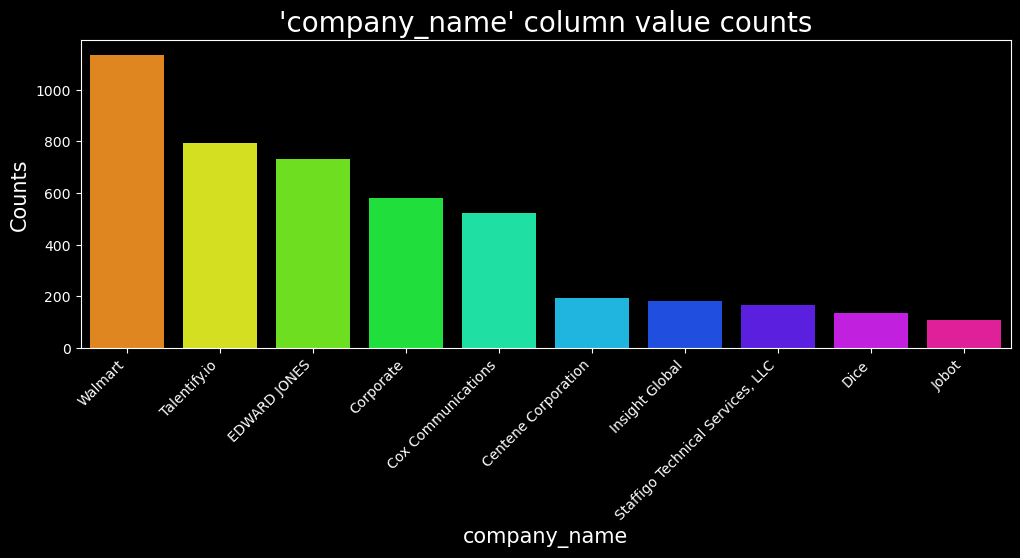

In [144]:
eda_plot(jobs_df_cleaned, 'company_name', topn=10)

Summary

### What is the location spread for our dataset?

What the function does

location_cleaned
United States         8299
Anywhere              7192
Missouri              3542
Oklahoma              2006
Kansas                1786
Arkansas              1608
California              99
Multiple Locations      44
Name: count, dtype: int64

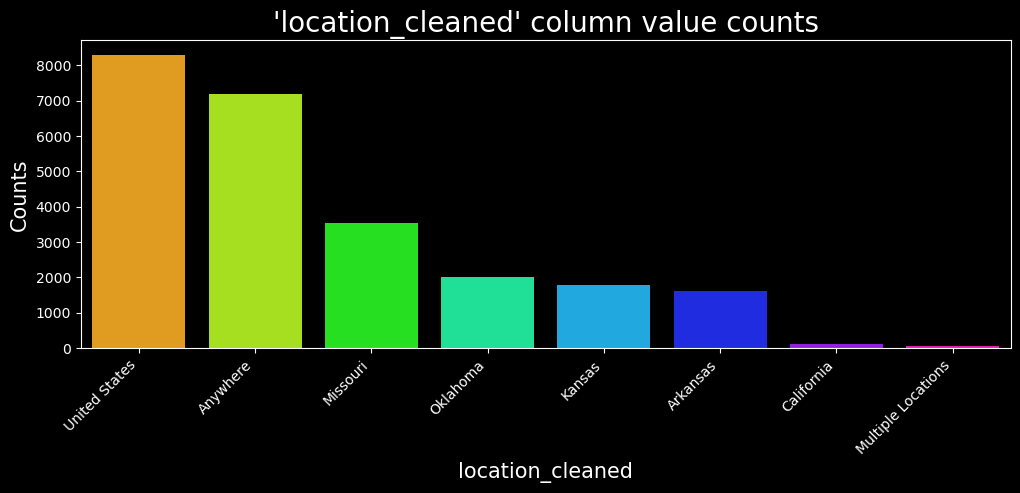

In [151]:
eda_plot(jobs_df_cleaned, 'location_cleaned', topn=8)

### Within the Google Jobs search, which site has the most postings?

What the function does

via
via LinkedIn        8315
via BeBee           3224
via Trabajo.org     2647
via ZipRecruiter    1962
via Indeed          1256
Name: count, dtype: int64

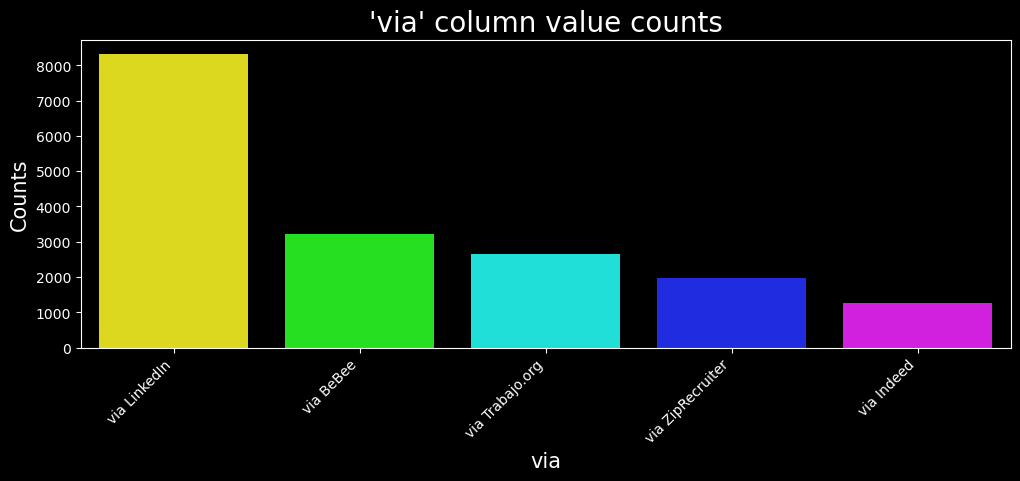

In [145]:
eda_plot(jobs_df_cleaned, 'via', topn=5)

### What words are most common in data job descriptions?

What the function does

In [152]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

def plot_most_common_words(df, column_name, n):
    """
    Get the n most common words from a specific column of a dataframe and plot them.
    
    Parameters:
    - df (DataFrame): The dataframe containing the data.
    - column_name (str): The name of the column containing lists of words.
    - n (int): The number of most common words to retrieve.
    """
    
    # Ensure the column is interpreted as lists, but only if the value is a string
    df[column_name] = df[column_name].apply(lambda x: eval(x) if isinstance(x, str) else x)

    # Get the frequency of each word in each row
    word_frequency = df[column_name].apply(lambda words_list: {word: 1 for word in set(words_list)})
    
    # Combine all the dictionaries into one big dictionary
    combined_frequency = Counter({key: 0 for key in set().union(*word_frequency)})
    for freq in word_frequency:
        combined_frequency.update(freq)

    # Sort the dictionary by values in descending order and get the top n words
    most_common_words = combined_frequency.most_common(n)

    # Convert to DataFrame
    result_df = pd.DataFrame(most_common_words, columns=['word', 'count'])

    # Sort by highest occurence first
    result_df = result_df.sort_values(by='count', ascending=True)
    
    # Calculate the frequency
    total_rows = df.shape[0]
    result_df['frequency'] = result_df['count'] / total_rows

    # Generate a list of colors
    colors = sns.color_palette('hsv', len(result_df))

    # Plot common words
    plt.figure(figsize=(15, 10))
    plt.barh(result_df['word'], result_df['count'], color=colors)
    plt.title('Most Common Words in Job Descriptions')
    plt.xlabel('Count')
    plt.ylabel('Word')
    plt.show()

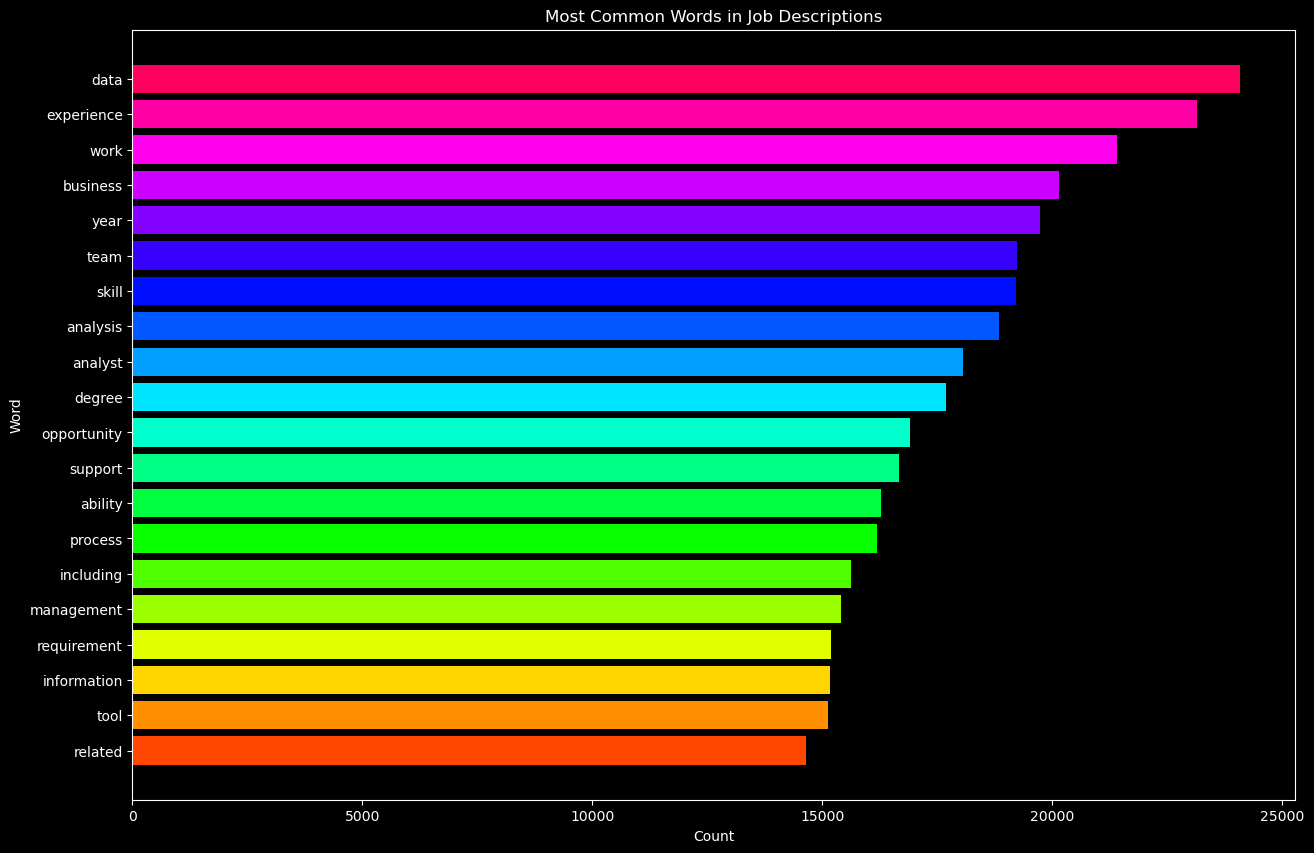

In [153]:
plot_most_common_words(jobs_df_cleaned, 'description_cleaned', 20)

### Do a majority of places allow work from home or want you in the work place?
<i> Remember this is full time only </i>

What the function does

work_from_home
False    17477
True      7192
Name: count, dtype: int64

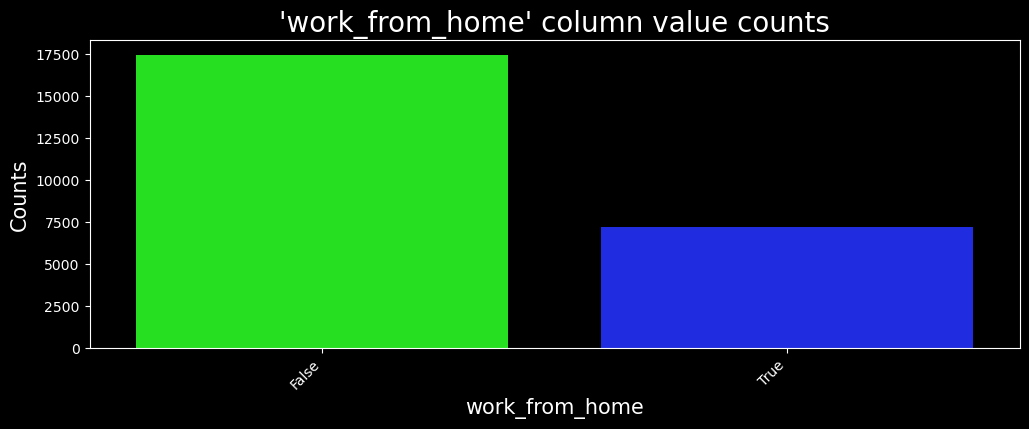

In [154]:
eda_plot(jobs_df_cleaned, 'work_from_home', topn=2)

### What sectors are hiring the most data analysts?

What the function does

sector
Business       14684
Finance         5769
Other           1711
Technology      1090
Healthcare       811
Education        550
Retail            41
Real Estate       13
Name: count, dtype: int64

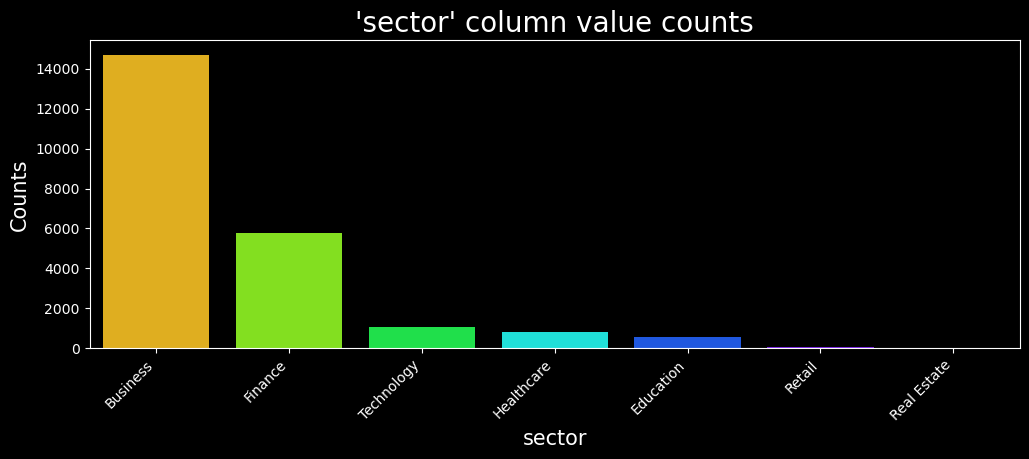

In [155]:
eda_plot(jobs_df_cleaned[jobs_df_cleaned['sector'] != 'Other'], 'sector', topn=10)

### What are the overall top things to learn for data jobs?

In [ ]:
import numpy as np

def filtered_keywords(jobs_filtered, keywords, title=None, head=10):
    # get keywords in a column
    count_keywords = pd.DataFrame(jobs_filtered.description_tokens.sum()).value_counts().rename_axis('keywords').reset_index(name='counts')

    # get frequency of occurence of word (as word only appears once per line)
    length = len(jobs_filtered) # number of job postings
    count_keywords['percentage'] = 100 * count_keywords.counts / length

    # plot the results
    count_keywords = count_keywords[count_keywords.keywords.isin(keywords)]
    count_keywords = count_keywords.head(head)
    g = plt.bar(x="keywords", height="percentage", data=count_keywords , color=np.random.rand(len(count_keywords.keywords), 3))
    plt.xlabel("")
    plt.ylabel("Likelyhood to be in job posting (%)")
    plt.xticks(rotation = 45, ha='right')
    plt.title(f'Top {head} {title} for Data Jobs') 
    plt.show(g)

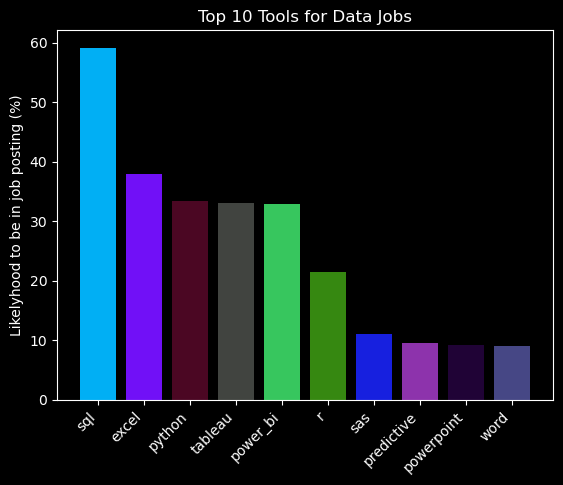

In [165]:
filtered_keywords(jobs_df_cleaned, keywords, title="Tools")

### What are the most common programming languages in data jobs?

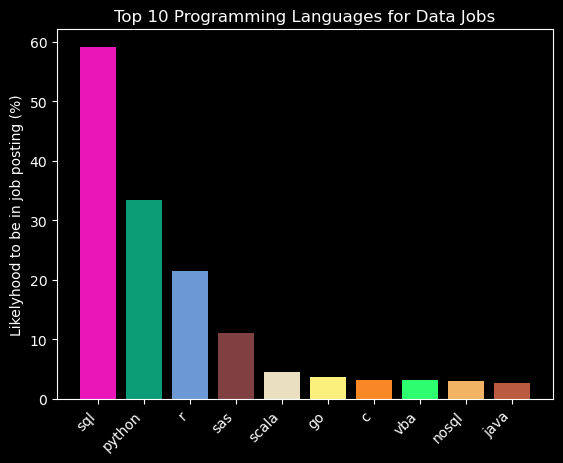

In [162]:

filtered_keywords(jobs_df_cleaned, keywords_programming, title="Programming Languages", head=10)

Summary

### What are the most common Machine Learning principles for data jobs?

What the function does

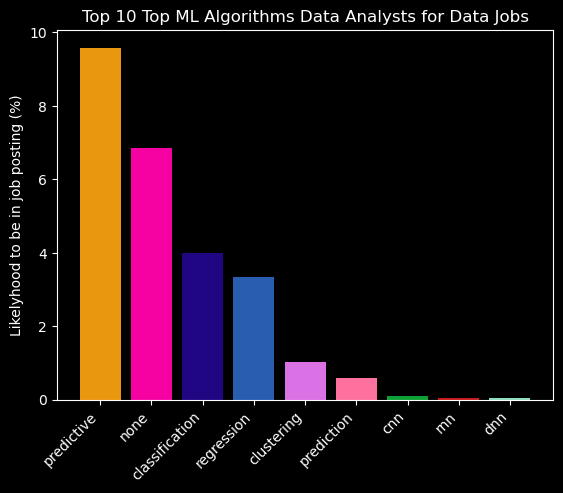

In [163]:
filtered_keywords(jobs_df_cleaned, keywords_ML_Algorithms, title="Top ML Algorithms Data Analysts")

### When do we see most data jobs being posted?

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_monthly_postings(df):
    """
    Plot the number of postings per month based on the DataFrame's datetime index.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    """

    # Resample the datetime index to monthly frequency and count the number of postings
    monthly_postings = df.resample('M').size()

    # Change the format of monthly_postings index to be MMM-YYYY
    monthly_postings.index = monthly_postings.index.strftime('%b-%Y')

    # Drop November 2023
    monthly_postings = monthly_postings.drop('Nov-2023')

    # Plot the monthly postings
    fig, ax = plt.subplots(figsize=(12, 4))
    monthly_postings.plot(kind="bar", ax=ax)
    ax.set_title("Value counts by month")
    ax.set_ylabel("Counts")

    plt.xticks(rotation=45, ha="right")
    plt.show()

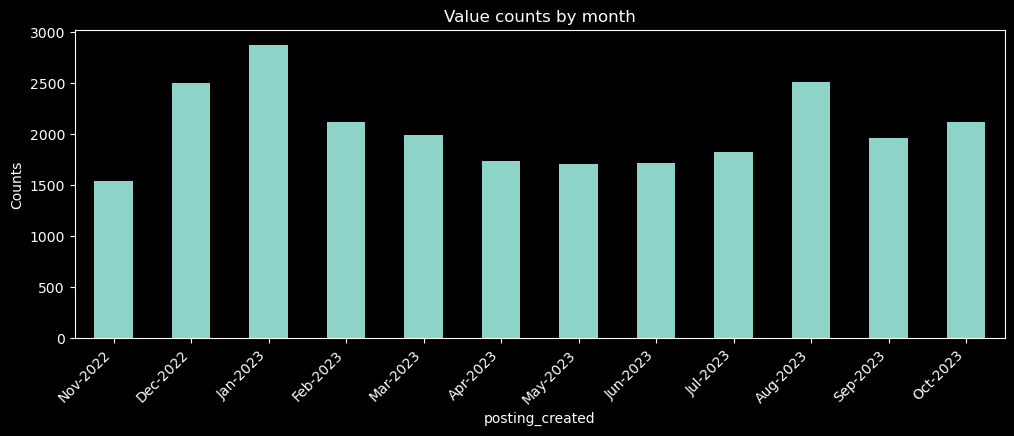

In [184]:
plot_monthly_postings(jobs_df_cleaned)

What the function does

In [186]:
def get_top_skills(df, qty):
    """
    This function takes a DataFrame and a quantity as parameters. 
    It returns a DataFrame with the top skills by number of postings, their frequency, and their average yearly salary. 
    The quantity parameter determines the number of top skills to return.

    Parameters:
    df (DataFrame): The input DataFrame.
    qty (int): The number of top skills to return.

    Returns:
    DataFrame: A DataFrame with the top skills, their number of postings, their frequency, and their average yearly salary.
    """
    
    # Initialize an empty dictionary to store the skills and their counts
    skills_counts = {}
    
    # Loop over the values in the 'description_tokens' column
    for val in df.description_tokens.values:
        # Convert the list of skills in each posting to a set to remove duplicates
        unique_skills = set(val)
        # Increment the count for each unique skill
        for skill in unique_skills:
            if skill in skills_counts:
                skills_counts[skill] += 1
            else:
                skills_counts[skill] = 1
    
    # Get the top skills and their counts
    top_skill_count = sorted(skills_counts.items(), key=lambda x: -x[1])[:qty]
    
    # Separate the skills and counts into two lists
    top_skills = list(map(lambda x: x[0], top_skill_count))
    top_counts = list(map(lambda x: x[1], top_skill_count))
    
    # Initialize an empty list to store the average salaries
    salaries = []
    
    # Loop over the top skills and calculate their average salary
    for skill in top_skills: 
        skill_df = df[df.description_tokens.apply(lambda x: skill in x)]
        if skill_df.avg_salary.isna().all():  # If all salaries for this skill are NaN
            salaries.append(np.nan)  # Append NaN to the salaries list
        else:
            salaries.append(skill_df.avg_salary.mean())
    
    # Create a DataFrame with the top skills, their number of postings, and their average yearly salary
    top_skills_df = pd.DataFrame({
        "skill": top_skills, 
        "number_of_postings": top_counts,
        "avg_yearly_salary": [round(s) if s == s else np.nan for s in salaries]  # Only round the salary if it is not NaN
    })
    
    # Calculate the frequency of each skill
    top_skills_df['frequency (%)'] = round((top_skills_df['number_of_postings'] / df.shape[0]) * 100, 2)
    
    # Sort the DataFrame by average yearly salary in descending order
    top_skills_df = top_skills_df.sort_values("number_of_postings", ascending=False)

    # Remove 'none'
    top_skills_df = top_skills_df[top_skills_df['skill'] != 'none']

    # Round values to 2 decimals
    top_skills_df['avg_yearly_salary'] = top_skills_df['avg_yearly_salary'].round()
    
    return top_skills_df

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Create a dropdown selector for the skill category
skill_list_dropdown = widgets.Dropdown(
    options=[
        ('All Skills', keywords), 
        ('Programming Languages', keywords_programming), 
        ('ML Algorithms', keywords_ML_Algorithms), 
        ('Visualization Tools', keyword_viz + keyword_bi + keyword_bi_2), 
        ('Big Data & Cloud', keywords_cloud_tools + keyword_big_data)
    ],
    value=keywords,
    description='Skill Category:',
)

# Create a slider to select the number of skills to plot
num_skills_slider = widgets.IntSlider(
    value=10,
    min=1,
    max=50,
    step=1,
    description='Number of Skills:',
)

plot_button = widgets.Button(description='Plot')
reset_button = widgets.Button(description='Reset')

def plot_skills_data(top_skills_df):
    plot_button.on_click(update_plot)
    reset_button.on_click(reset_selection)

    display(skill_list_dropdown, num_skills_slider, plot_button)

def update_plot(b):
    clear_output(wait=True)
    # Filter DataFrame based on selected skills
    df = top_skills_df[top_skills_df['skill'].isin(skill_list_dropdown.value)]

    # Select top N skills based on frequency
    df = df.nlargest(num_skills_slider.value, 'frequency (%)')

    fig = px.bar(df, x='skill', y='frequency (%)',
                    color='avg_yearly_salary', color_continuous_scale='Blues')

    fig.update_traces(textfont_size=20,
                        hovertemplate='''
    <b>Skill:</b> %{x} <br> \
    <b>Frequency:</b> %{y}% <br> \
    <b>Average Salary:</b> $%{marker.color}<extra></extra>''',
                    hoverlabel=dict(font_size=20))

    fig.update_layout(
        title_text="Data Jobs - Salaries and Popularity<br><i style='font-size: 15px;'>Hover for details</i>", 
        coloraxis_colorbar=dict(title="Average Annual Salary"),
        height=400,
        width=1200,
    )

    fig.show()
    display(reset_button)

def reset_selection(b):
    clear_output(wait=True)
    plot_skills_data(top_skills_df)

plot_skills_data(top_skills_df)

Dropdown(description='Skill Category:', options=(('All Skills', ['sql', 'python', 'r', 'c', 'c#', 'javascript'…

IntSlider(value=10, description='Number of Skills:', max=50, min=1)

Button(description='Plot', style=ButtonStyle())

### What are top skills overall?

In [209]:
top_skills_df = get_top_skills(jobs_df_cleaned, 100)

interact(update_plot, top_n=top_n_slider, skill_list=skill_list_dropdown)

interactive(children=(IntSlider(value=19, continuous_update=False, description='Top N Skills:', max=50, min=1)…

<function __main__.update_plot(top_n, skill_list)>

### A deeper look into individual skills

In [277]:
from IPython.display import clear_output
import ipywidgets as widgets

def interactive_skill_salary(b):
    clear_output(wait=True)
    skill = skill_selector.value
    if skill is None:  # Don't plot if skill is None
        return None
    # Filter the dataframe for jobs that mention the selected skill and have a salary
    skill_df = jobs_df_cleaned[jobs_df_cleaned['description_tokens'].apply(lambda x: skill in x) & jobs_df_cleaned['avg_salary'].notna()].sort_values(by='avg_salary')

    # Reset the index
    skill_df = skill_df.reset_index(drop=True)

    total_df = jobs_df_cleaned[jobs_df_cleaned['description_tokens'].apply(lambda x: skill in x)]
    
    # Calculate the average salary for the selected skill
    avg_salary = skill_df['avg_salary'].mean()

    # Create a bar plot
    fig = px.bar(skill_df, x=skill_df.index, y='avg_salary', 
                 hover_data=['avg_salary', 'description_tokens', 'company_name'],  # Include 'company_name' in the hover data
                 labels={'avg_salary':'Salary ($)', 'index':'Jobs WITH Salary'},
                 title=f'Salary Distribution for Skill: {skill}')

    # Format hover data
    fig.update_traces(hovertemplate=
                      "<b>%{customdata[1]}</b><br><br>" +
                      "<b>Avg Salary:</b> %{y:$,.2f}<br>" +
                      "<b>Skills:</b> %{customdata[0]}<br>" +
                      "<extra></extra>"
                     )

    # Add a line for the average salary
    fig.add_shape(
        type='line',
        line=dict(dash='dash'),
        y0=avg_salary,
        y1=avg_salary,
        x0=0,
        x1=1,
        xref='paper',
        yref='y'
    )

    # Add a text label for the average salary
    fig.add_annotation(
        y=avg_salary + 15000,
        x=0,
        xref='paper',
        yref='y',
        text=f'Average Salary: ${avg_salary:.2f}',
        showarrow=False,
        font=dict(size= 20, color='red')
    )

    # Update layout
    fig.update_layout(
        autosize=True,
        hovermode='closest',
        showlegend=False,
        plot_bgcolor='white',
        yaxis=dict(title='Salary ($)'),
        xaxis=dict(title='Jobs WITH Salary')
    )

    fig.show()
    display(reset_button)

def reset_selection(b):
    clear_output(wait=True)
    display(skill_selector, plot_button)

# Get the top skills sorted alphabetically
sorted_skills = sorted(top_skills_df['skill'].unique())

# Interactive dropdown widget
skill_selector = widgets.Dropdown(
    options=sorted_skills,
    description='Skill:'
)

plot_button = widgets.Button(description='Plot')
plot_button.on_click(interactive_skill_salary)

reset_button = widgets.Button(description='Reset')
reset_button.on_click(reset_selection)

display(skill_selector, plot_button)

Dropdown(description='Skill:', index=25, options=('airflow', 'alteryx', 'amazon', 'asp.net', 'assembly', 'atla…

Button(description='Plot', style=ButtonStyle())

### Job title specific skills

In [276]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display, clear_output

def plot_top_skills(df, qty, title_cleaned=None):
    # Filter the dataframe based on the selected job title
    if title_cleaned:
        df = df[df['title_cleaned'] == title_cleaned]

    # Get the top skills
    top_skills_df = get_top_skills(df, qty)

    # Calculate the ratio of postings the word shows up in and convert to percentage
    top_skills_df['number_of_postings'] = (top_skills_df['number_of_postings'] / len(df)) * 100

    # Sort by number of postings
    top_skills_df.sort_values(by='number_of_postings', ascending=False, inplace=True)

    # Plot it
    fig = px.bar(top_skills_df, x='skill', y='number_of_postings', color='avg_yearly_salary', color_continuous_scale='Blues')

    fig.update_traces(textfont_size=40, hovertemplate='''<b>Skill:</b> %{x}<br><b>Postings:</b> %{y}%<br><b>Average Annual Salary:</b> $%{marker.color}<extra></extra>''', hoverlabel=dict(font_size=20))

    fig.update_layout(
        title_text=f"<b style='font-size: 30px;'>{title_cleaned if title_cleaned else 'All Jobs'} Skills</b><br><i style='font-size: 20px;'>Salaries and Popularity</i>", 
        title_x=0.1, font_color="black",
        coloraxis_colorbar=dict(title="Average Annual Salary"),
        yaxis=dict(title='Percentage of Postings')
    )
    fig.show()

    # Display the 'Go Back' button after the plot
    display(go_back_button)

qty_slider = widgets.IntSlider(min=1, max=50, step=1, value=10, description='Top skills:')
title_dropdown = widgets.Dropdown(options=['All Data Jobs'] + list(jobs_df_cleaned['title_cleaned'].unique()), description='Job title:')
update_button = widgets.Button(description='Update Plot')
go_back_button = widgets.Button(description='Go Back')

def on_update_button_clicked(b):
    qty = qty_slider.value
    title = title_dropdown.value
    if title == 'All Data Jobs':
        title = None
    clear_output(wait=True)
    plot_top_skills(jobs_df_cleaned, qty, title)

def on_go_back_button_clicked(b):
    clear_output(wait=True)
    display(qty_slider, title_dropdown, update_button)

update_button.on_click(on_update_button_clicked)
go_back_button.on_click(on_go_back_button_clicked)

display(qty_slider, title_dropdown, update_button)

IntSlider(value=10, description='Top skills:', max=50, min=1)

Dropdown(description='Job title:', options=('All Data Jobs', 'Data Analyst', 'Data Engineer', 'Data Scientist'…

Button(description='Update Plot', style=ButtonStyle())

<div style="background-color: #; padding: 0px; ">

## <font size='5'><i>Plan → Acquire → Prepare → Explore → </i></font> <font size='10'><i>**Model**</i></font> <font size='5'><i>→ Deliver</i></font>
---

In [254]:
# Plays a sound when this is done running

import os

os.system('afplay /System/Library/Sounds/Ping.aiff')

0

### Term Frequency-Inverse Document Frequency (TF-IDF) 

Useful hyperparameters for `TfidfVectorizer`:

- `max_features`: This hyperparameter controls the maximum number of features (i.e., terms) to include in the TF-IDF matrix. Setting this to a smaller value can help reduce the dimensionality of the matrix and improve performance, especially if the dataset is large.

- `min_df` and `max_df`: These hyperparameters control the minimum and maximum document frequency of terms to include in the TF-IDF matrix. Setting `min_df` to a higher value will exclude terms that appear in fewer than `min_df` documents, while setting `max_df` to a lower value will exclude terms that appear in more than `max_df` documents. These can be useful for removing very rare or very common terms that may not be informative.

- `ngram_range`: This hyperparameter controls the range of n-grams to include in the TF-IDF matrix. An n-gram is a contiguous sequence of n words in a document. Setting `ngram_range` to `(1, 1)` will include only unigrams (i.e., single words), while setting it to `(1, 2)` will include both unigrams and bigrams (i.e., pairs of words).

- `stop_words`: This hyperparameter can be set to a list of stop words to exclude from the TF-IDF matrix. Stop words are common words that are unlikely to be informative, such as "the", "and", and "of".

- `tokenizer`: This hyperparameter can be set to a custom tokenizer function to use instead of the default tokenizer. The tokenizer function should take a string as input and return a list of tokens (i.e., words).

These hyperparameters can be tuned to improve the performance of the TF-IDF vectorization for a specific task or dataset.

In [29]:
# Find the baseline to get a language correct
df.language.value_counts()

language
java          64
typescript    58
python        57
ruby          56
javascript    56
c++           53
go            44
html          33
Name: count, dtype: int64

In [31]:
# Find the baseline to get a language correct
df.language.value_counts(normalize=True)

language
java          0.152019
typescript    0.137767
python        0.135392
ruby          0.133017
javascript    0.133017
c++           0.125891
go            0.104513
html          0.078385
Name: proportion, dtype: float64

In [32]:
df.shape

(421, 6)

### X & Y Modeling Splits

In [33]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train_validate, X_test, y_train_validate, y_test = train_test_split(
    read_me["preprocessed_readme"], read_me["language"], test_size=0.2, random_state=321
)

# Split the train set into train and validation sets
X_train, X_validate, y_train, y_validate = train_test_split(
    X_train_validate, y_train_validate, test_size=0.25, random_state=321
)

# Print the shapes of the resulting datasets
print(f"Train Size:      X: {X_train.shape[0]}, Y: {y_train.shape[0]}")
print(f"Validation Size: X: {X_validate.shape[0]}, Y: {y_validate.shape[0]}")
print(f"Test Size:       X: {X_test.shape[0]}, Y: {y_test.shape[0]}")

Train Size:      X: 421, Y: 421
Validation Size: X: 141, Y: 141
Test Size:       X: 141, Y: 141


### Baseline: 13%

### The cell below has been converted to markdown so it will not run. 

Convert back to Python in the bottom right to run GridSearch again.

The cell below is the results from the GridSearch

```python

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Create a pipeline
pipeline = Pipeline(
    [
        ("tfidf", TfidfVectorizer()),
        ("logreg", LogisticRegression(max_iter=1000, random_state=321)),
    ]
)

# Define the parameter grid
param_grid = {
    "tfidf__max_features": [50, 250, 500, 750, 1000],
    "tfidf__ngram_range": [(1, 1), (1, 2), (1, 3)],
    "tfidf__min_df": [10, 25, 50, 250, 500],
    "tfidf__max_df": [25, 50, 100, 250, 500],
    "logreg__C": [0.1, 1, 10],
    "logreg__penalty": ["l1", "l2"],
}

# Initialize GridSearchCV with return_train_score=True
grid_search = GridSearchCV(
    pipeline, param_grid, cv=2, n_jobs=-1, verbose=1, return_train_score=True
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the results of the grid search
results = pd.DataFrame(grid_search.cv_results_)

# Calculate the train-validation score gap for each parameter combination
results["score_gap"] = results["mean_train_score"] - results["mean_test_score"]

# Print the results
print(results[["params", "mean_train_score", "mean_test_score", "score_gap"]])

```

```python

# Trim GridSearch DF down to what we need

results_trimmed = results[
    ["score_gap", "mean_test_score", "mean_train_score", "params"]
]

# Round all results to 2 decimals

results_trimmed = results_trimmed.round(5)

# Show highest test score, then lowest score gap, where test score >= X

results_trimmed[
    (results_trimmed["mean_test_score"] >= 0.3)
    & (results_trimmed["score_gap"] <= 0.3)
].sort_values(by=["mean_test_score", "score_gap"], ascending=[False, True])

In [34]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df=250, max_features=500, min_df=25, ngram_range=(1, 2))
X = tfidf.fit_transform(df["preprocessed_readme"])
y = df["language"]

# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=321)

# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(random_state=321)
logit.fit(X_train, y_train)

# Calculate the accuracy of the model
print(f"Logistic Regression Train Accuracy: {logit.score(X_train, y_train)}")

Logistic Regression Train Accuracy: 0.9079365079365079


In [35]:
print(f"Logistic Regression Test Accuracy: {logit.score(X_test, y_test)}")

Logistic Regression Test Accuracy: 0.6132075471698113


### Process to Save Our Models for Reapplying

*converted to raw to not export new model files*

```python

import pickle

# Save the TfidfVectorizer object
with open("support_files/tfidf_vectorizer2.pkl", "wb") as file:
    pickle.dump(pipeline.named_steps['tfidf'], file)

# Save the LogisticRegression object
with open("support_files/logreg_model2.pkl", "wb") as file:
    pickle.dump(pipeline.named_steps['logreg'], file)

## Function(ize) It

## Testing the Functions (With our pulled Repos)

In [36]:
w.predict_language()

Random String: r net implementation keras repository attempt reproduce results presented technical report microsoft research asia report describes complex neural network called r net designed question answering blogpost describes details r net currently august 25 2017 best single model stanford qa database squad squad dataset uses two performance metrics exact match em f1 score f1 human performance estimated em823 f1912 test set report describes two versions r net first one called r net wang et al 2017 refers paper yet available online reaches em713 f1797 test set consists input encoders modified version match lstm self matching attention layer main contribution paper pointer network second version called r net march 2017 one additional bigru self matching attention layer pointer network reaches em723 f1807 current best single model squad leaderboard higher score means r net development continued march 2017 ensemble models reach higher scores repository contains implementation first ve

In [37]:
w.predict_language(readme_string="license public new void")

Predicted: java (Score: 0.73)

Other possible predictions:
c++: 0.05
typescript: 0.05


In [38]:
# Read in our README

readme = requests.get(
    "https://raw.githubusercontent.com/Zacharia-Schmitz/nlp_project/main/README.md"
).text

In [39]:
w.predict_language(readme_string=readme)

Predicted: python (Score: 0.44)

Other possible predictions:
c++: 0.12
javascript: 0.10


## Add model predictions to DF

In [40]:
# Add a column named prediction, that adds the model prediction to the dataframe
df["prediction"] = logit.predict(X)

In [41]:
# What percentage of language = prediction
(df.language == df.prediction).mean()

0.833729216152019

In [42]:
# Format for export
prediction_df = df[["language", "prediction", "readme"]]

```python

# Export predictions
prediction_df.to_csv('support_files/predictions.csv', index=False)

<div style="background-color: #; padding: 0px; ">

## <font size='5'><i>Plan → Acquire → Prepare → Explore → Model →</i></font> <font size='10'><i>**Deliver**</i></font>
---

### Takeaways

- Some Repositories Have Multiple Languages

- Read up on scraping/API policy beforehand

- Cache along the way

### Recommendations

#### For Modeling:

- **Feature Engineering:** Consider extracting additional features from the README text, such as the number of code snippets, mentions of specific libraries, and the use of certain punctuations typical to a programming language.

- **Ensemble Methods:** Combine multiple models for better prediction. For instance, a combination of logistic regression, random forests, and gradient boosting might yield improved results.

- **Deep Learning:** Explore deep learning techniques like RNNs or Transformers (e.g., BERT) which can capture sequential information in the text and might improve accuracy.

#### For Data Collection:

- **Diversify Sources:** To avoid biases, collect READMEs from various sources, not just popular repositories, to ensure a diverse representation of projects and languages.

- **Update Data Periodically:** Languages and their ecosystems evolve. Ensure the dataset is updated periodically to reflect recent trends and libraries.

### Next Steps:

- **Validation:** Set up a validation framework to periodically test the model on new READMEs and ensure its predictions remain accurate over time.

- **Expand Scope:** Beyond predicting programming languages, consider expanding the project's scope to categorize projects based on their purpose (e.g., web development, data analysis, gaming).

- **Topic Modeling:** Beyond just predicting the language, perform topic modeling on READMEs to identify common themes or topics within specific language communities.